## What is ETL?

ETL is actually short form of Extract, Transform and Load, a process in which data is acquired, changed/processes and then finally get loaded into data warehouse/database(s).

You can extract data from data sources like Files, Website or some Database, transform the acquired data and then load the final version into database for business usage.

You may ask, Why ETL?, well, what ETL does, many of you might already been doing one way or other by writing different functions/scripts to perform tasks but one of the main advantage of ETLs is visualizing your entire data flow pipeline thus help you make decisions according to that.

Let's start with building our own ETL pipeline.
* Extract data from CSV file
* Transform/Manipulate Data
* Load Data into MongoDB

#Импорт csv

In [1]:
import csv

To deal with files in Python, we use the open() function, it’s a built-in Python function. This function accepts two different arguments (inputs) in the parentheses, always in the following order:
* the name of the file (as a string)
* the mode of working with the file (as a string)

The syntax to open a file in python is:

file_obj = open(“filename”, “mode”)  

# Чтение файла

In [2]:
f = open(r'suppliers.csv')
reader = csv.reader(f)
print(reader)

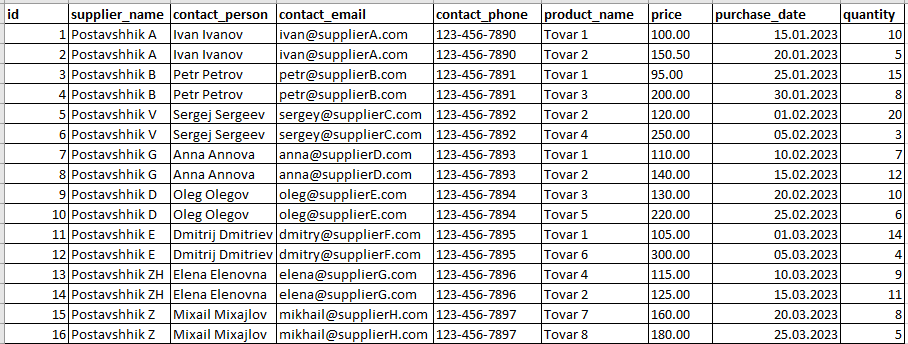

Transforming/Changing the data.

In [3]:
Code = ['Поставщик А','Поставщик Б','Поставщик В','Поставщик Д', 'Поставщик Ж']

supp_data = []

next(reader, None)
for row in reader:
    if(row[1] in Code):
        row[3] = float(row[6]) * 100
        supp_data.append(row)

print(len(supp_data))
print(supp_data[0:4])

10
[['1', 'Поставщик А', 'Иван Иванов', 10000.0, '123-456-7890', 'Товар 1', '100.00', '2023-01-15', '10'], ['2', 'Поставщик А', 'Иван Иванов', 15050.0, '123-456-7890', 'Товар 2', '150.50', '2023-01-20', '5'], ['3', 'Поставщик Б', 'Петр Петров', 9500.0, '123-456-7891', 'Товар 1', '95.00', '2023-01-25', '15'], ['4', 'Поставщик Б', 'Петр Петров', 20000.0, '123-456-7891', 'Товар 3', '200.00', '2023-01-30', '8']]


Loading the data into SQL DB

# Загрузка в SQL DB

In [4]:
import sqlite3
conn = sqlite3.connect('sessia.db')

In [5]:
try:
    conn.execute('DROP TABLE IF EXISTS `suppliers` ')
except Exception as e:
    print(str(e))

In [6]:
try:
    conn.execute('''
CREATE TABLE suppliers (
    id INT,
    supplier_name VARCHAR(100),
    contact_person VARCHAR(100),
    contact_email VARCHAR(100),
    contact_phone VARCHAR(15),
    product_name VARCHAR(100),
    price DECIMAL(10, 2),
    purchase_date DATE,
    quantity INT);''')
    print ("Table created successfully");
except Exception as e:
    print(str(e))
    print('Table Creation Failed')
finally:
    conn.close()

Table created successfully


In [7]:
print(supp_data[4])

['5', 'Поставщик В', 'Сергей Сергеев', 12000.0, '123-456-7892', 'Товар 2', '120.00', '2023-02-01', '20']


# Выбор столбцов

In [8]:
data_s = [(row[0], row[1], row[3], row[5], row[6], row[7], row[8]) for row in supp_data]
data_s[:2]

[('1', 'Поставщик А', 10000.0, 'Товар 1', '100.00', '2023-01-15', '10'),
 ('2', 'Поставщик А', 15050.0, 'Товар 2', '150.50', '2023-01-20', '5')]

In [13]:
conn = sqlite3.connect('sessia.db')
cur = conn.cursor()
try:
    cur.executemany("INSERT INTO suppliers(id, supplier_name,contact_person, product_name, price, purchase_date, quantity) VALUES (?,?,?,?,?,?,?)", data_s)
    conn.commit()
    print('Data  Successfully')
except Exception as e:
    print(str(e))
    print('Data Failed')
finally:
    conn.close()

Data  Successfully


#Вывод строк

In [14]:
conn = sqlite3.connect('sessia.db')
rows = conn.cursor().execute('select * from suppliers')
for row in rows:
    print(row)

(1, 'Поставщик А', '10000.0', None, None, 'Товар 1', 100, '2023-01-15', 10)
(2, 'Поставщик А', '15050.0', None, None, 'Товар 2', 150.5, '2023-01-20', 5)
(3, 'Поставщик Б', '9500.0', None, None, 'Товар 1', 95, '2023-01-25', 15)
(4, 'Поставщик Б', '20000.0', None, None, 'Товар 3', 200, '2023-01-30', 8)
(5, 'Поставщик В', '12000.0', None, None, 'Товар 2', 120, '2023-02-01', 20)
(6, 'Поставщик В', '25000.0', None, None, 'Товар 4', 250, '2023-02-05', 3)
(9, 'Поставщик Д', '13000.0', None, None, 'Товар 3', 130, '2023-02-20', 10)
(10, 'Поставщик Д', '22000.0', None, None, 'Товар 5', 220, '2023-02-25', 6)
(13, 'Поставщик Ж', '11500.0', None, None, 'Товар 4', 115, '2023-03-10', 9)
(14, 'Поставщик Ж', '12500.0', None, None, 'Товар 2', 125, '2023-03-15', 11)


Write data in a csv file

In [15]:
csvfile = open('itog_suppliers.csv', 'w')
csv_writer = csv.writer(csvfile, lineterminator='\r')
csv_writer.writerow(['id', 'supplier_name', 'contact_person', 'product_name', 'price', 'purchase_date', 'quantity'])
csv_writer.writerows(data_s)
csvfile.close()